### HOUSE_PRICE_PREDICTION_FEATURE_ENGIEERING ###

##  cicyle of data science ##
1.Data analysis
2.feature Enginering
3.Feature Selection
4.Model Bulding
5.Model Development
##

In [1]:
##Importing python libraries##

import numpy as np #(use for numerical computing. It's support for large, multi-dimensional arrays and matrices)
import pandas as pd #(data manipulation and analysis)
import matplotlib.pyplot as plt #(For data visulization)
%matplotlib inline 
import seaborn as sns  #(it's buld top of matplot lib it's provide high level interface for creating visulization)


### Reading data set ###

In [2]:
Dataset = pd.read_csv("/home/user/Desktop/data science/House_Price_predition/HOUSE_train.csv")

##Printing the data shape##
Dataset.shape

(1460, 81)

In [3]:
##Print top 5 records ##
Dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Find out the below stuffs
 1.Missing Valuse,
 2.FInd ALL Numarical valus \n
 3.Disribution of numerical variable
 4.categorical variable 
 5.cardinality of categorical variable
 6.outliers
 7.Reletionship between  categorical variable and depentaten variable
###

### Missing value Handling ###

In [13]:
##Find mising value in data set ##

Data_with_na = [Feature for Feature in Dataset.columns if Dataset[Feature].isnull().sum() >1 ]
print(len(Data_with_na))
##FInd The featue name and is's persentage ##

for Feature in Data_with_na:
    print(Feature,np.round(Dataset[Feature].isnull().mean(),4), "%missig value percentage")

18
LotFrontage 0.1774 %missig value percentage
Alley 0.9377 %missig value percentage
MasVnrType 0.5973 %missig value percentage
MasVnrArea 0.0055 %missig value percentage
BsmtQual 0.0253 %missig value percentage
BsmtCond 0.0253 %missig value percentage
BsmtExposure 0.026 %missig value percentage
BsmtFinType1 0.0253 %missig value percentage
BsmtFinType2 0.026 %missig value percentage
FireplaceQu 0.4726 %missig value percentage
GarageType 0.0555 %missig value percentage
GarageYrBlt 0.0555 %missig value percentage
GarageFinish 0.0555 %missig value percentage
GarageQual 0.0555 %missig value percentage
GarageCond 0.0555 %missig value percentage
PoolQC 0.9952 %missig value percentage
Fence 0.8075 %missig value percentage
MiscFeature 0.963 %missig value percentage


#this output show 18 missing valus and its persentage

## find relation between missing value and sale price ##

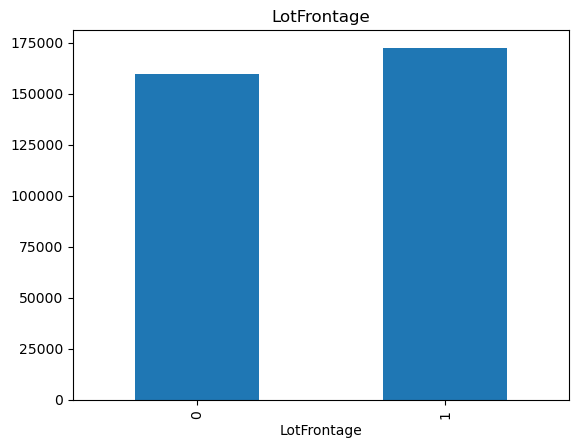

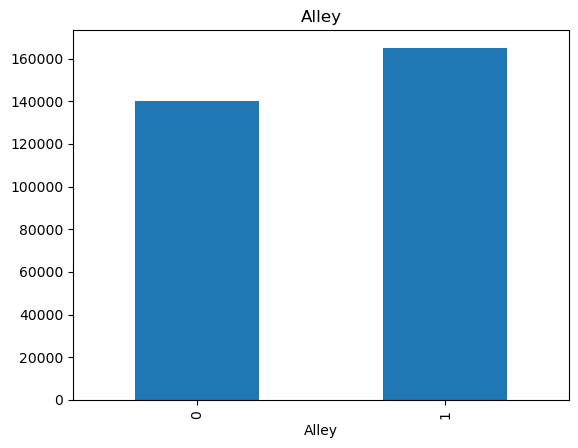

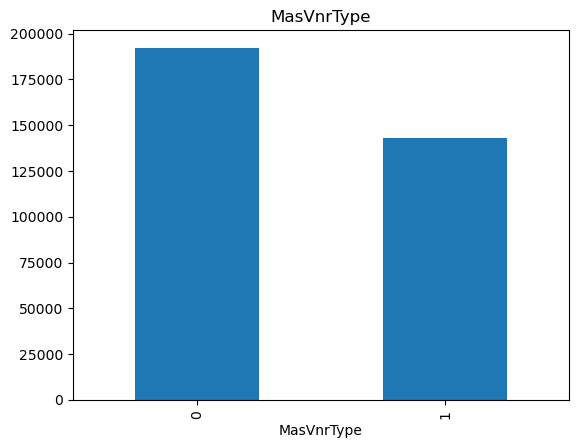

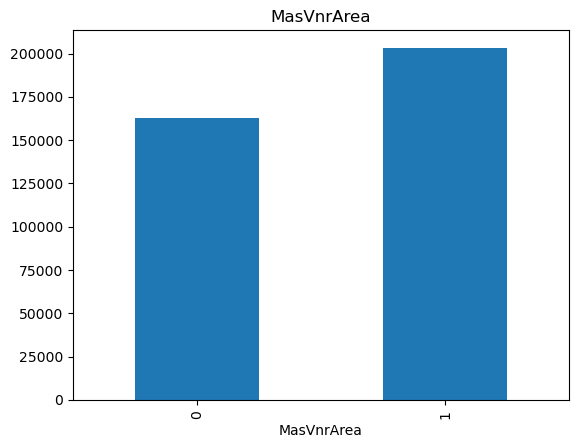

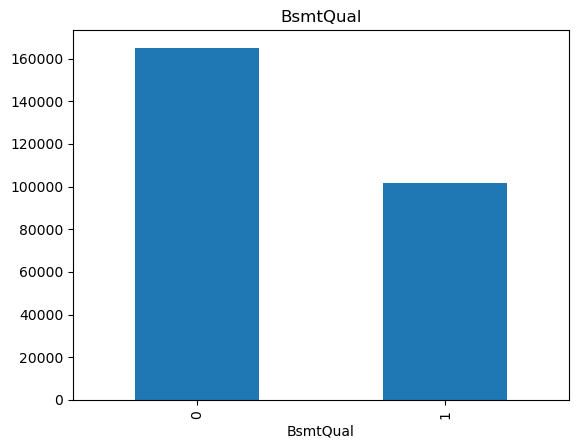

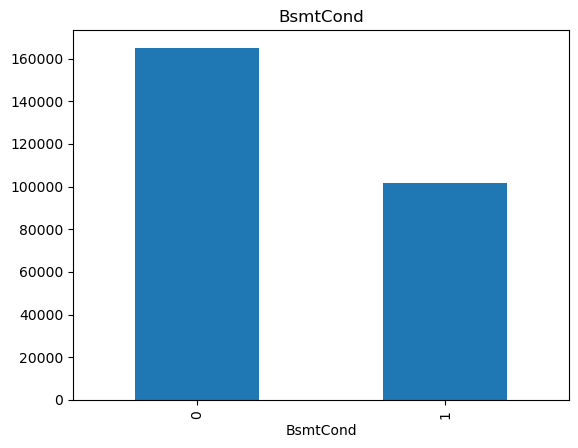

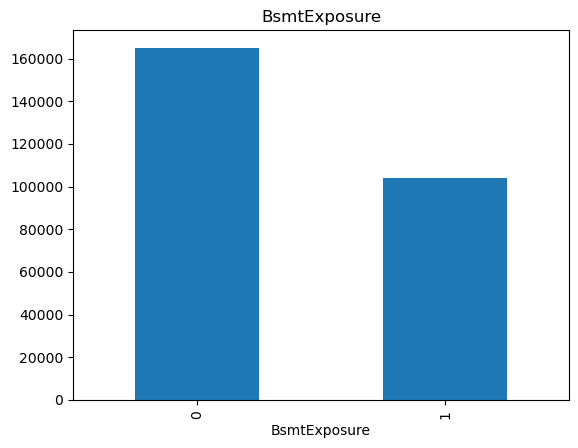

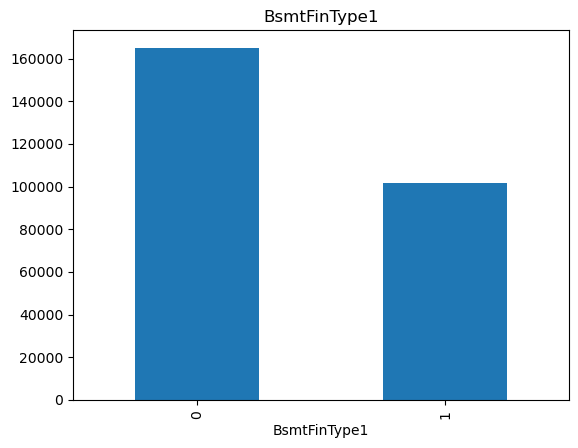

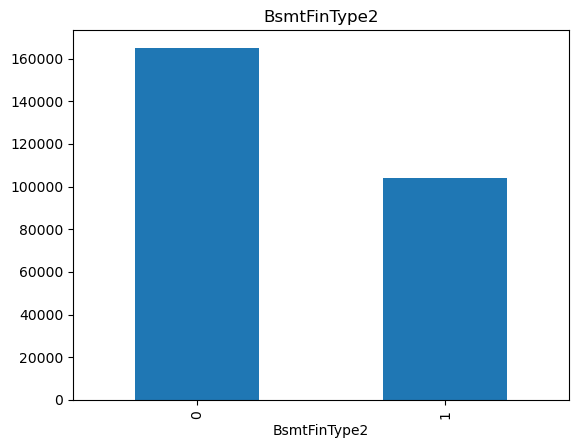

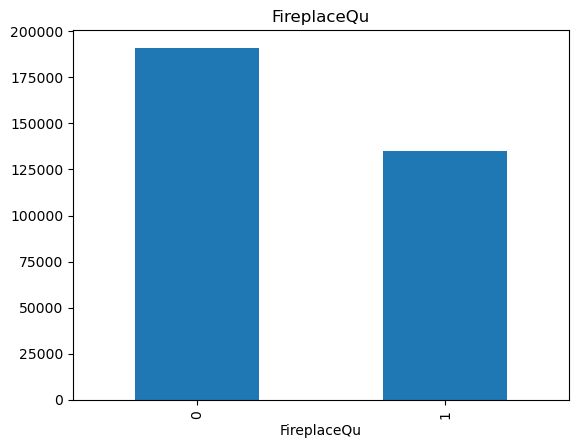

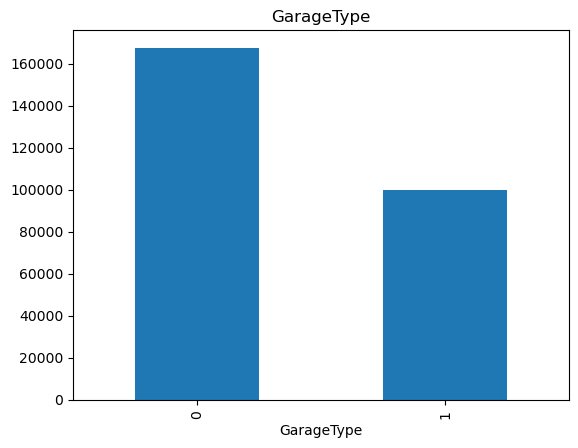

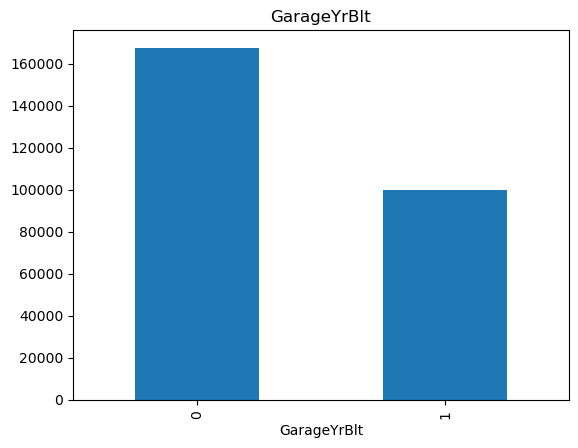

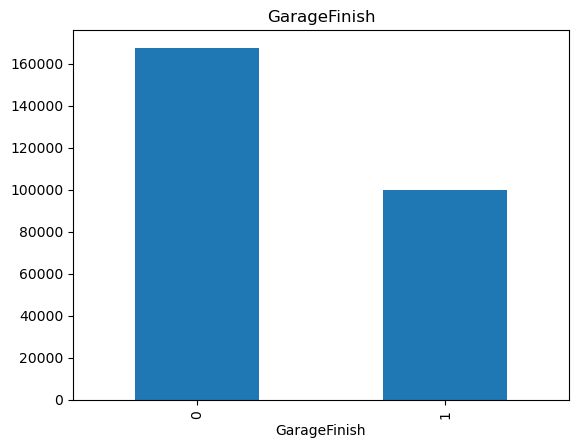

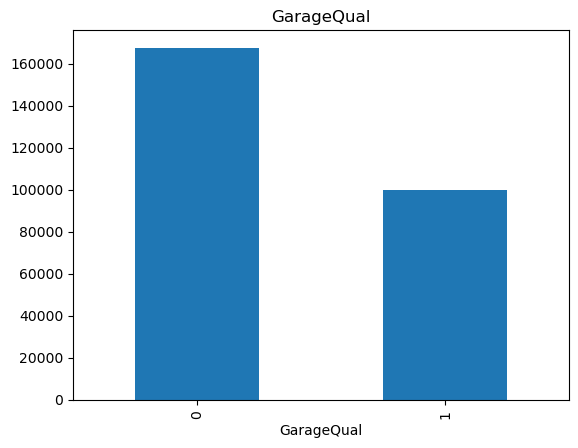

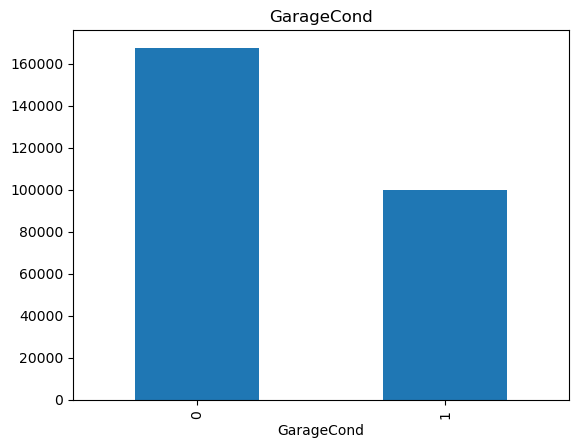

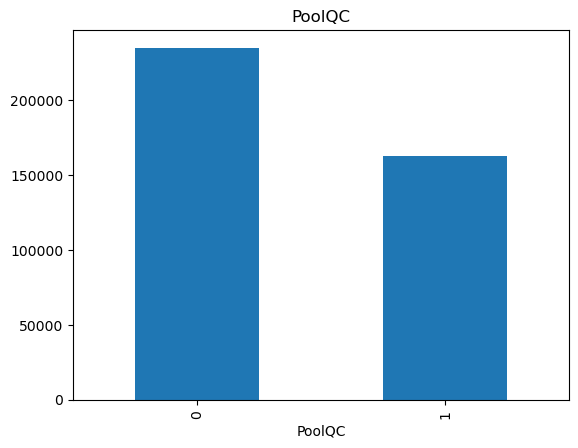

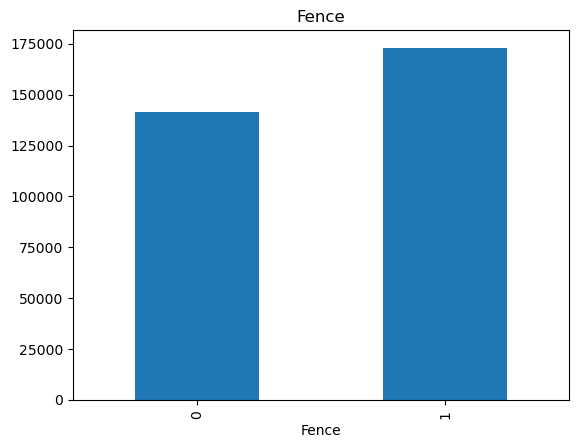

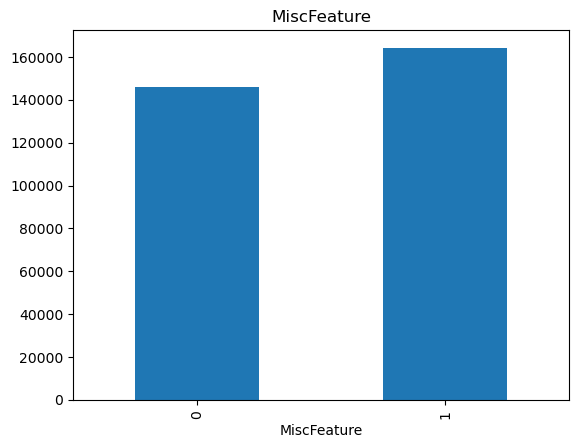

In [5]:
for Feature in Data_with_na:
    Data = Dataset.copy()


    #finding missing value from "Data" variable and if any missing value conert into 1 and else 0 
    Data[Feature] = np.where(Data[Feature].isnull(),1,0)  # 1 indicate null value



    Data.groupby(Feature)['SalePrice'].median().plot.bar()
    plt.title(Feature)
    plt.show()







#we can undarstant the relationship between missing value and dependant variable 

## find the numberical value in the data set ##

In [6]:
numerical_data = [Feature for Feature in Dataset.columns if Dataset[Feature].dtypes !='O']
#list the variable that contain numerical valu 
print('Number of numerical:',len(numerical_data))
Dataset[numerical_data].head()

Number of numerical: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## finding the year and date based features ##

In [7]:
year_feature = [Feature for Feature in numerical_data if 'Yr' in Feature or 'Year' in Feature ] 
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSlod')

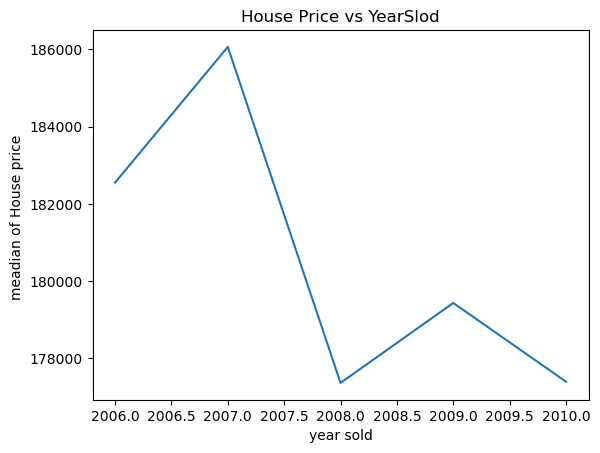

In [8]:
##Find the relation between years sold and house price ##


Dataset.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('year sold')
plt.ylabel('meadian of House price ')
plt.title('House Price vs YearSlod')

## find discreate variable and continous variable ##

In [9]:
discrate_var = [Feature for Feature in numerical_data if len(Dataset[Feature].unique())<50 and Feature not in year_feature +['Id']]
print("discreate Variables {}".format(len(discrate_var)))
discrate_var

discreate Variables 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

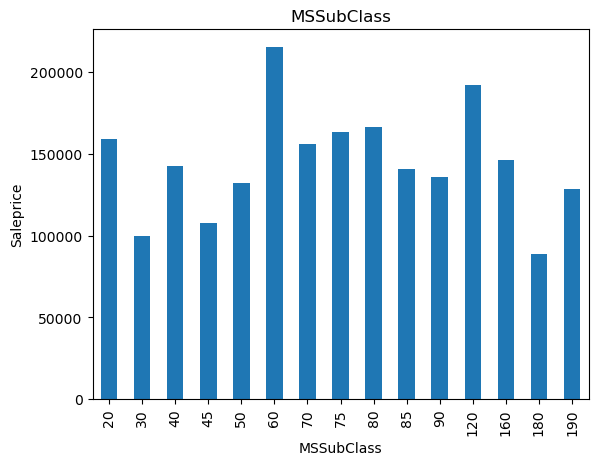

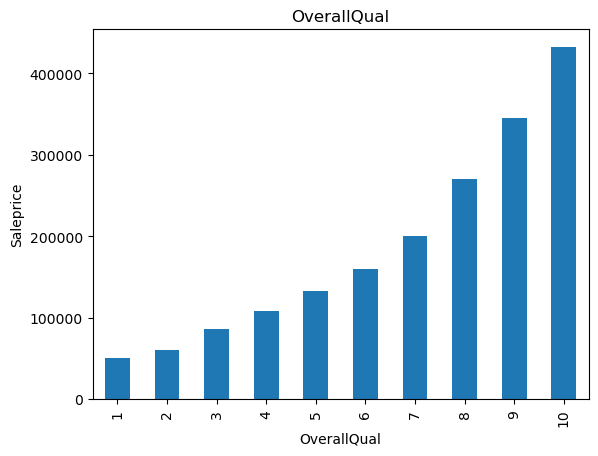

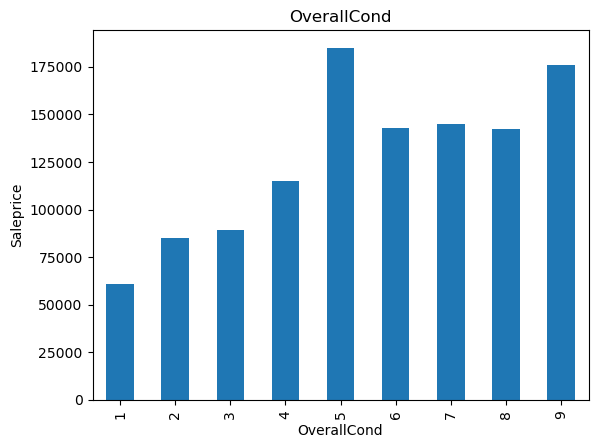

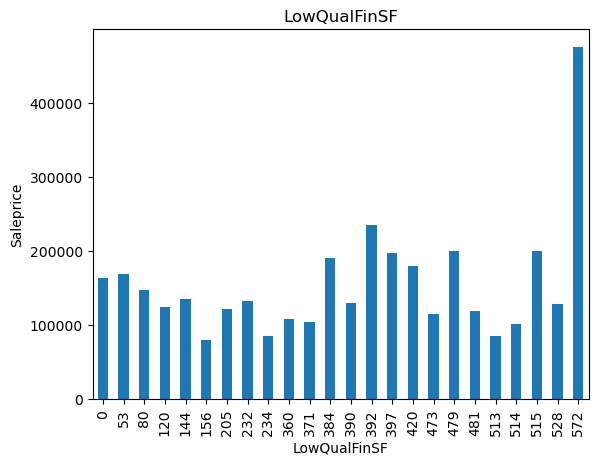

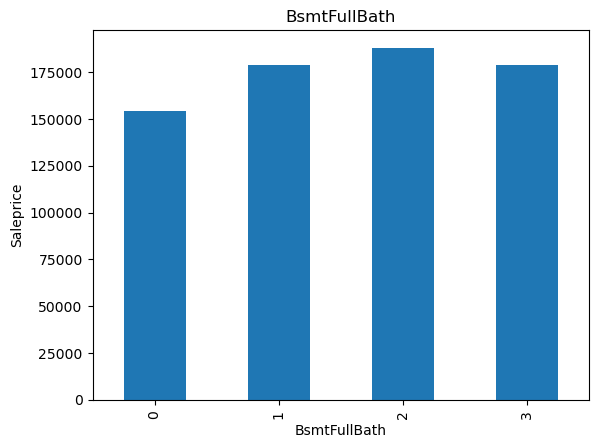

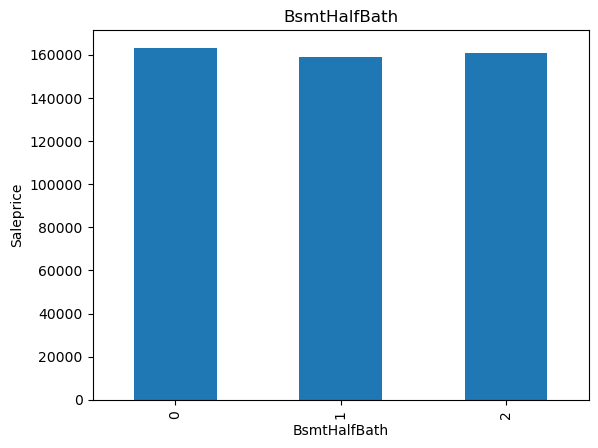

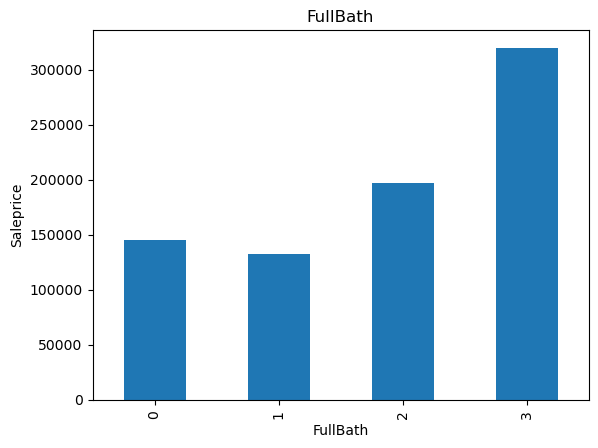

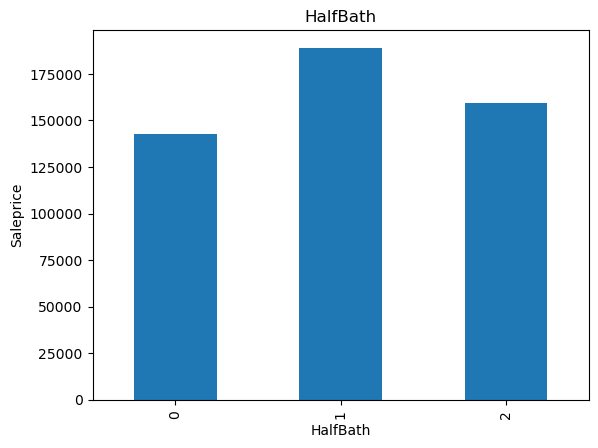

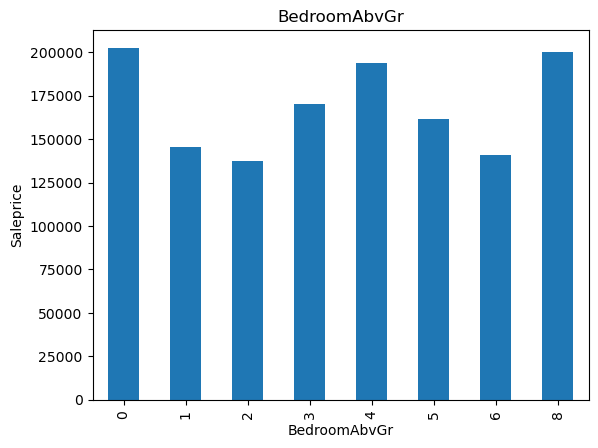

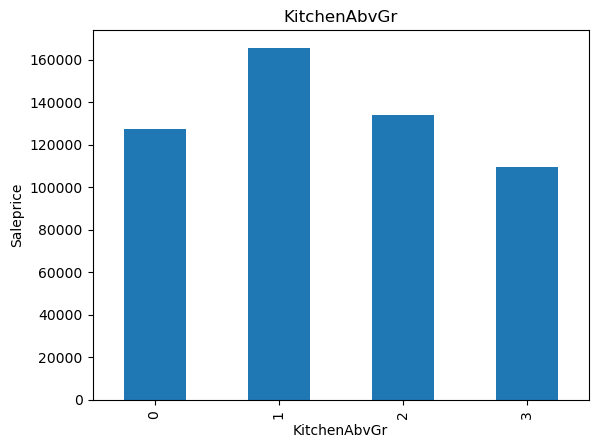

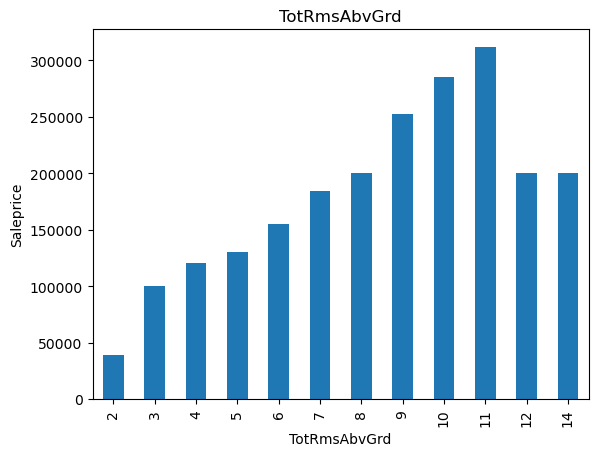

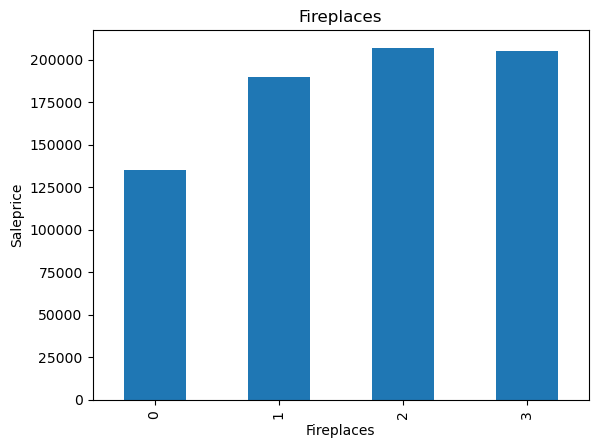

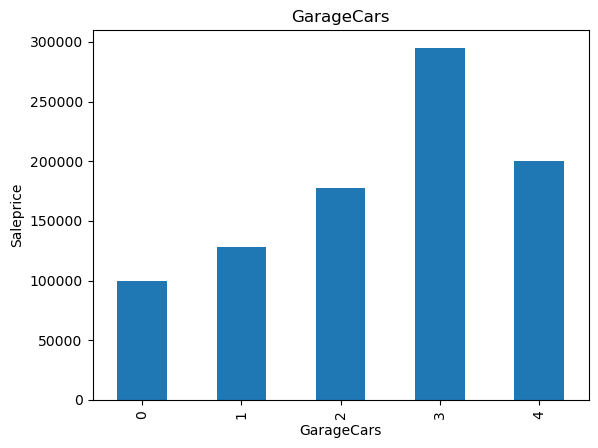

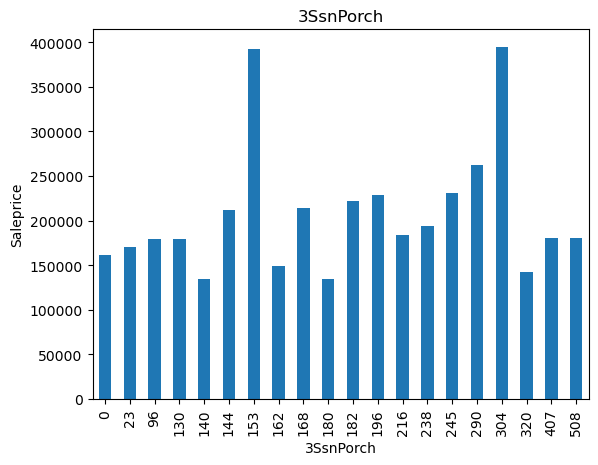

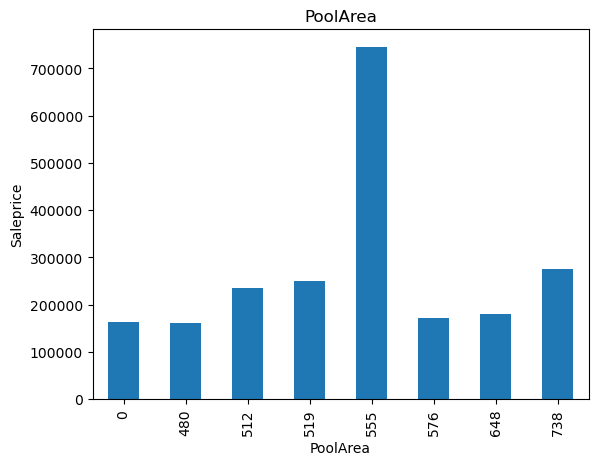

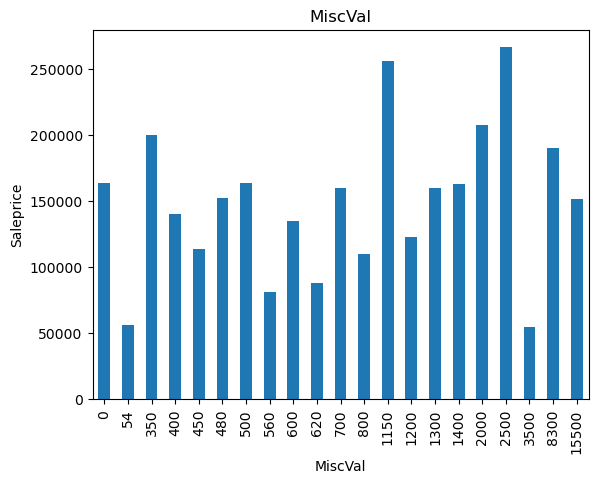

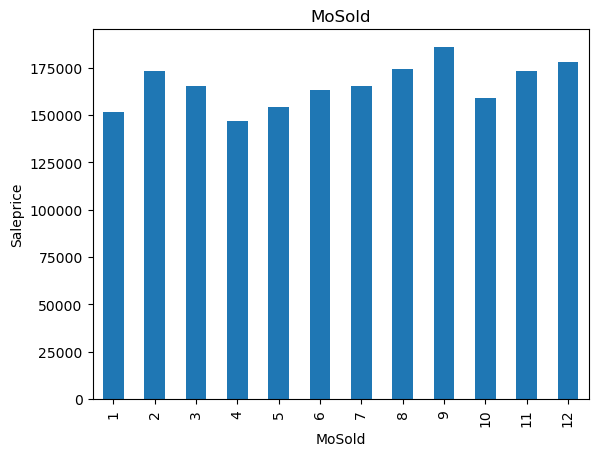

In [10]:
for Feature in discrate_var:
    data = Dataset.copy()
    data.groupby(Feature)['SalePrice'].median().plot.bar()
    plt.xlabel(Feature)
    plt.ylabel("Saleprice")
    plt.title(Feature)
    plt.show()

In [11]:
continous_var = [Feature for Feature in numerical_data if Feature not in discrate_var +['Id']+year_feature]
print('countinus value {}'.format(len(continous_var)))
continous_var

countinus value 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

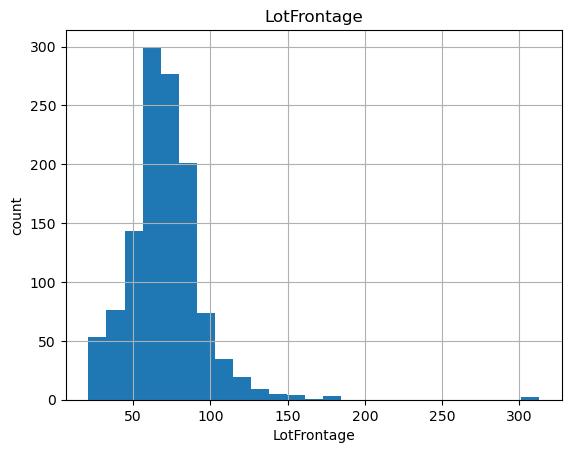

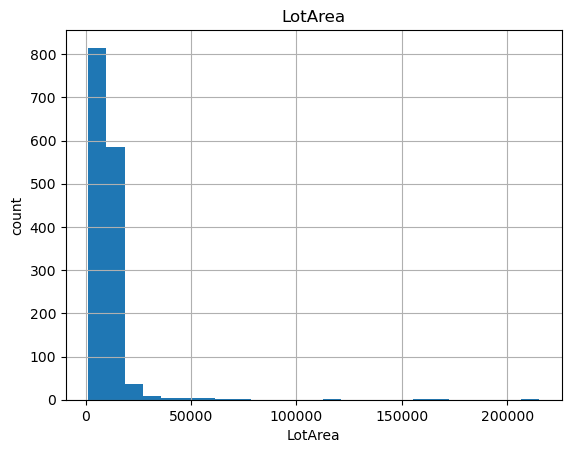

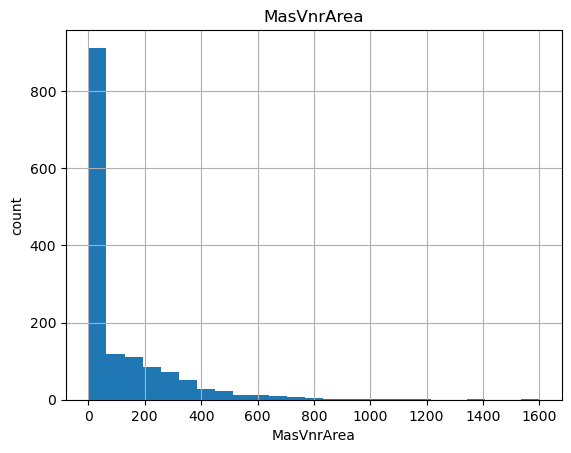

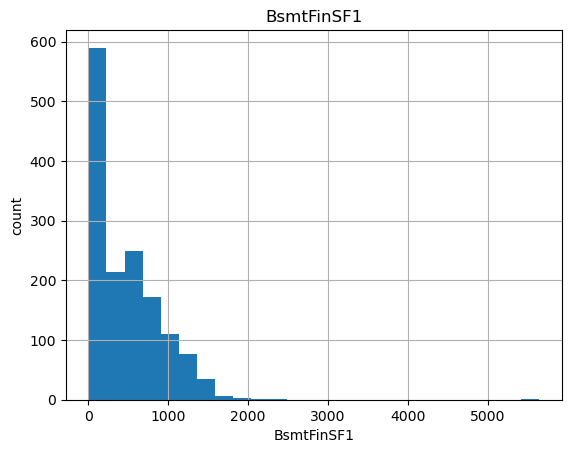

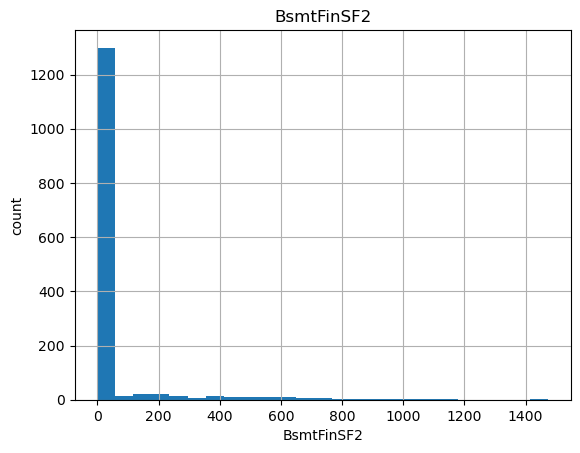

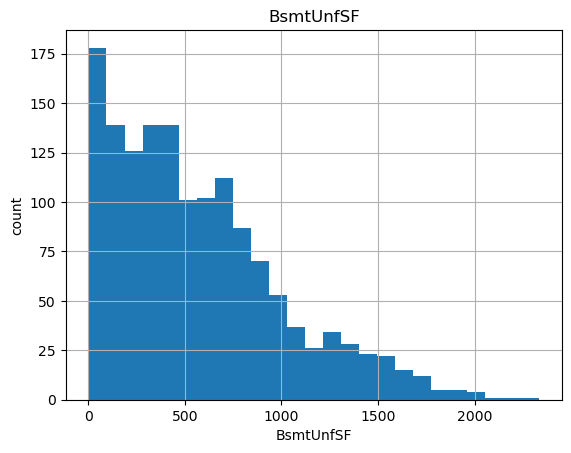

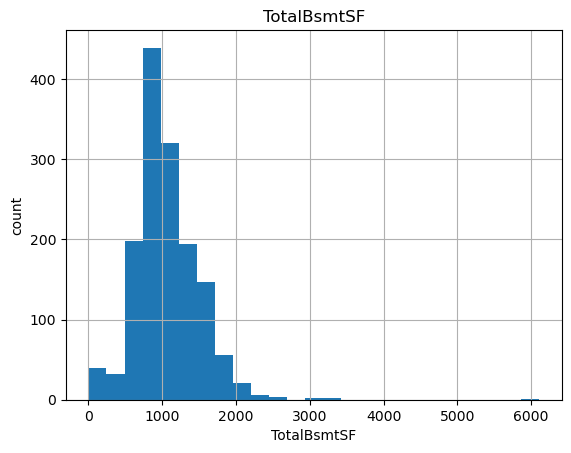

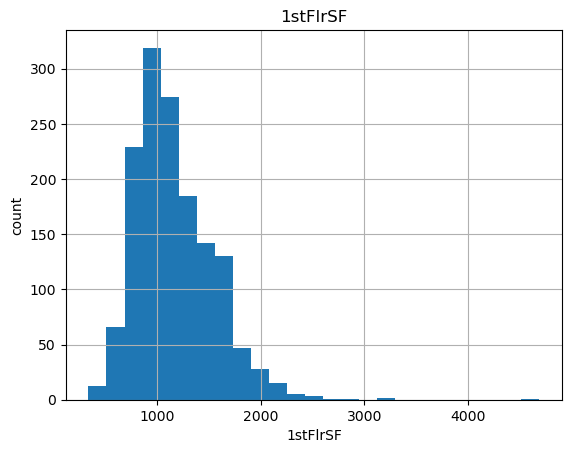

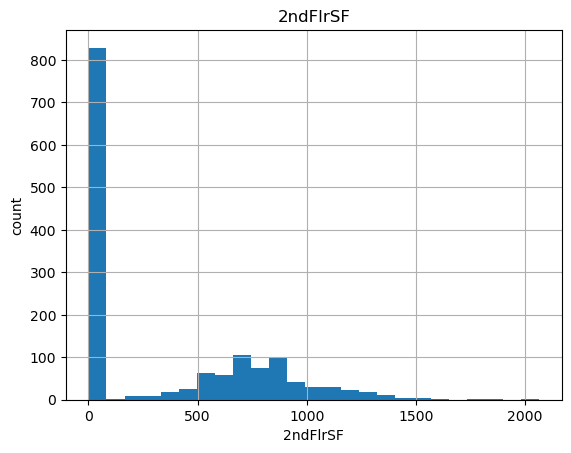

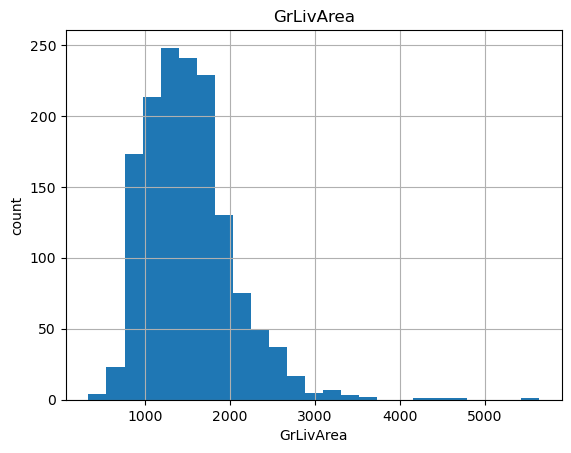

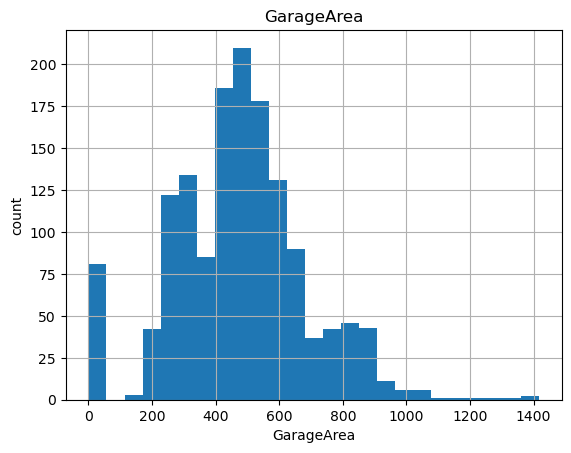

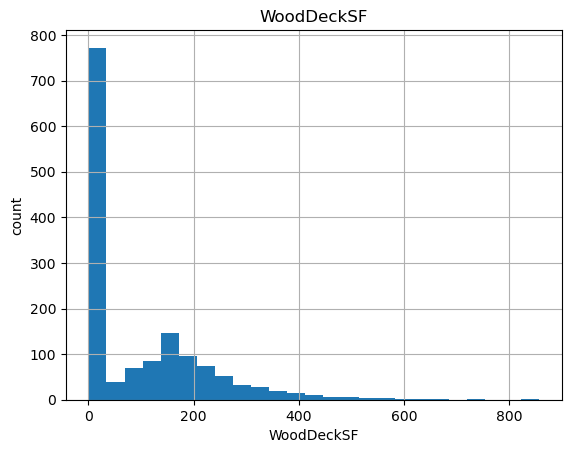

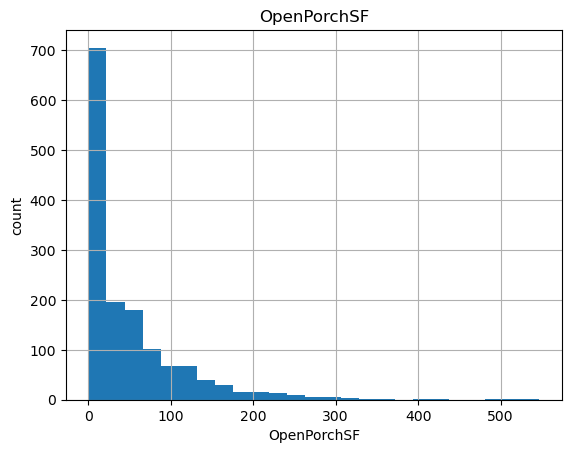

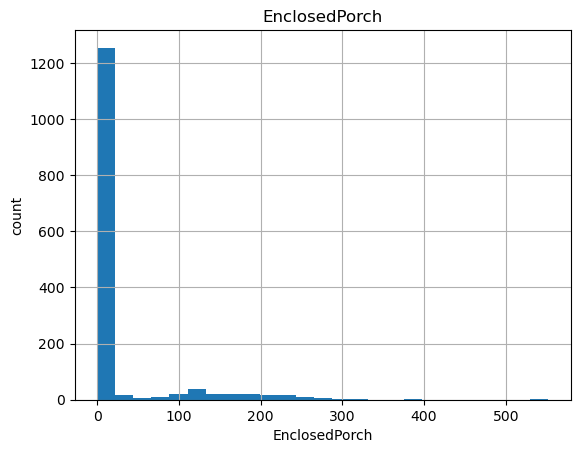

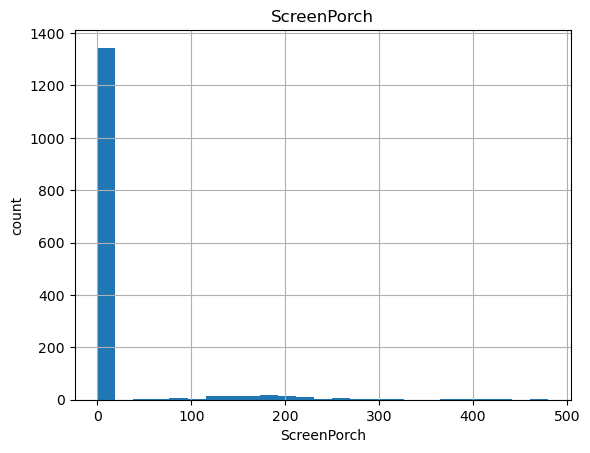

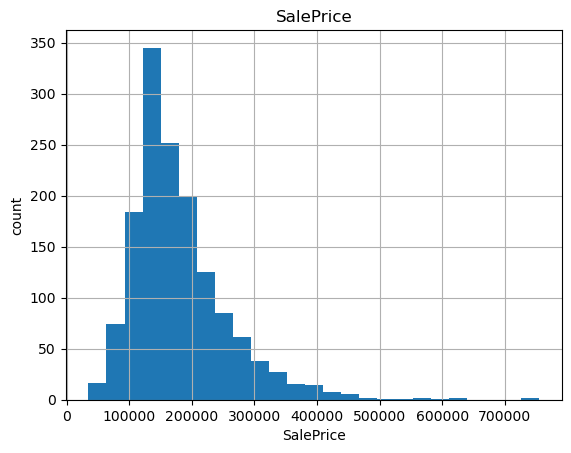

In [12]:
for Feature in continous_var:
    data=Dataset.copy()
    data[Feature].hist(bins=25)
    plt.xlabel(Feature)
    plt.ylabel('count')
    plt.title(Feature)
    plt.show()

# find outliers 

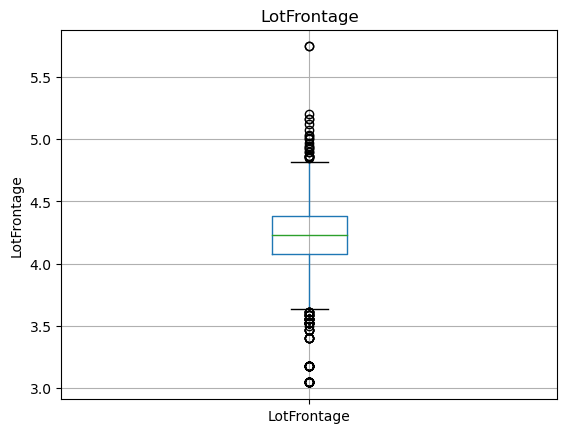

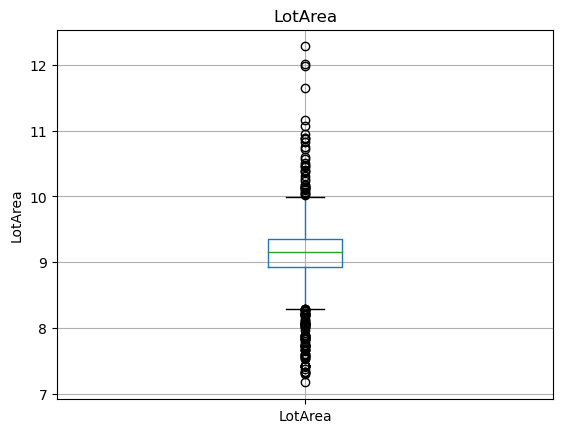

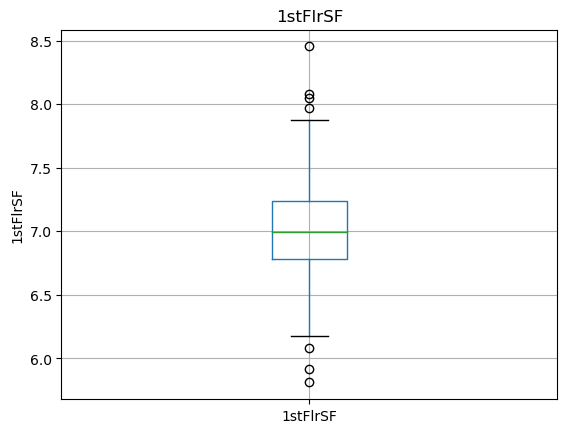

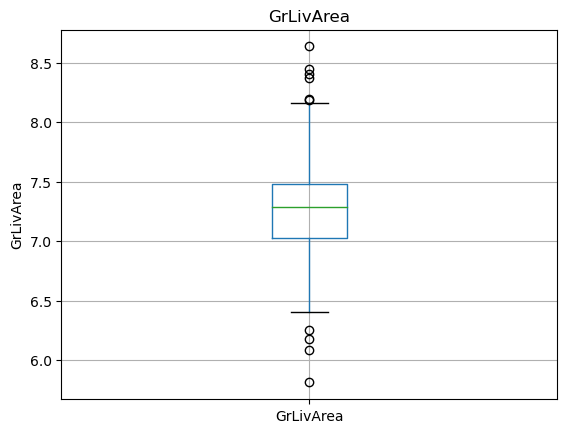

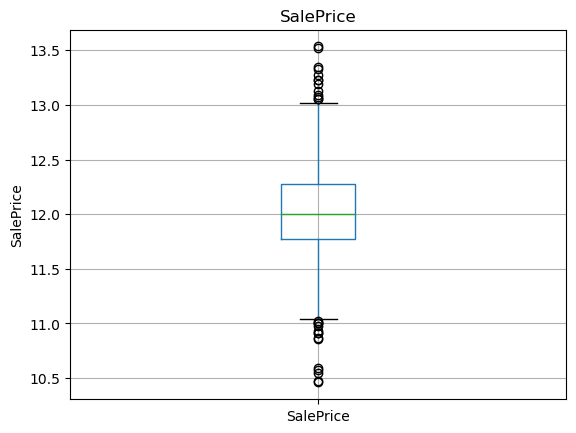

In [16]:
for Feature in continous_var:
    data =Dataset.copy()
    if 0 in data[Feature].unique():
        pass 
    else:
        data[Feature] = np.log(data[Feature])
        data.boxplot(column = Feature)
        plt.ylabel(Feature)
        plt.title(Feature)
        plt.show()

# Finding all categorical features 

In [24]:
categorical_featr = [Feature for Feature in data.columns if data[Feature].dtype=='O']
data[categorical_featr].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Finding unique categorical features 

In [30]:
for Feature in categorical_featr:
    print("Feature is {} number of unique values == {} ".format(Feature,len(Dataset[Feature].unique())))

Feature is MSZoning number of unique values == 5 
Feature is Street number of unique values == 2 
Feature is Alley number of unique values == 3 
Feature is LotShape number of unique values == 4 
Feature is LandContour number of unique values == 4 
Feature is Utilities number of unique values == 2 
Feature is LotConfig number of unique values == 5 
Feature is LandSlope number of unique values == 3 
Feature is Neighborhood number of unique values == 25 
Feature is Condition1 number of unique values == 9 
Feature is Condition2 number of unique values == 8 
Feature is BldgType number of unique values == 5 
Feature is HouseStyle number of unique values == 8 
Feature is RoofStyle number of unique values == 6 
Feature is RoofMatl number of unique values == 8 
Feature is Exterior1st number of unique values == 15 
Feature is Exterior2nd number of unique values == 16 
Feature is MasVnrType number of unique values == 4 
Feature is ExterQual number of unique values == 4 
Feature is ExterCond numbe